# IF3270 Pembelajaran Mesin Feedforward Neural Network


Group Number: 18

Group Members:
- Dhafin Fawwaz Ikramullah (13522084)
- Raden Rafly Hanggaraksa B (13522014)
- Saad Abdul Hakim (13522092)


## Import Libraries

In [5]:
import pandas as pd
import numpy as np
import numpy as np
import pickle
from sklearn.datasets import fetch_openml
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

## Import Dataset

In [2]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

# df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')
# df.head()

Sparsity with L1 penalty: 77.70%
Test score with L1 penalty: 0.8222
Example run in 5.455 s


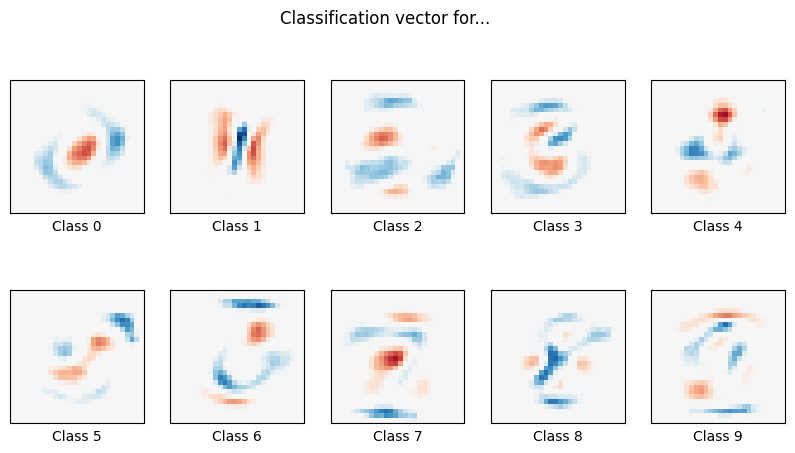

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for k in range(10):
    l1_plot = plt.subplot(2, 5, k + 1)
    l1_plot.imshow(
        coef[k].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % k)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

# Visualize

In [82]:
X_csv = pd.read_csv("dataset/X.csv")
y_csv = pd.read_csv("dataset/y.csv")


In [ ]:
from matplotlib.axes._axes import Axes

def visualize(X, y, row_count, col_count, offset = 0):
    # scale = np.abs(X).max()
    scale = 255 # in case we only pick some data and none of them reach the max value (255). 
    fig, axes = plt.subplots(row_count, col_count, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for i in range(row_count * col_count):
        ax: Axes = axes[i // col_count, i % col_count]
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(str(i+offset)+": "+str(int(y[i+offset])))
        
        ax.imshow(
            X[i+offset].reshape(28, 28),
            interpolation="nearest",
            cmap=plt.cm.RdBu,
            vmin=-scale,
            vmax=scale,
        )

    plt.show()

(70000, 784)
(70000,)


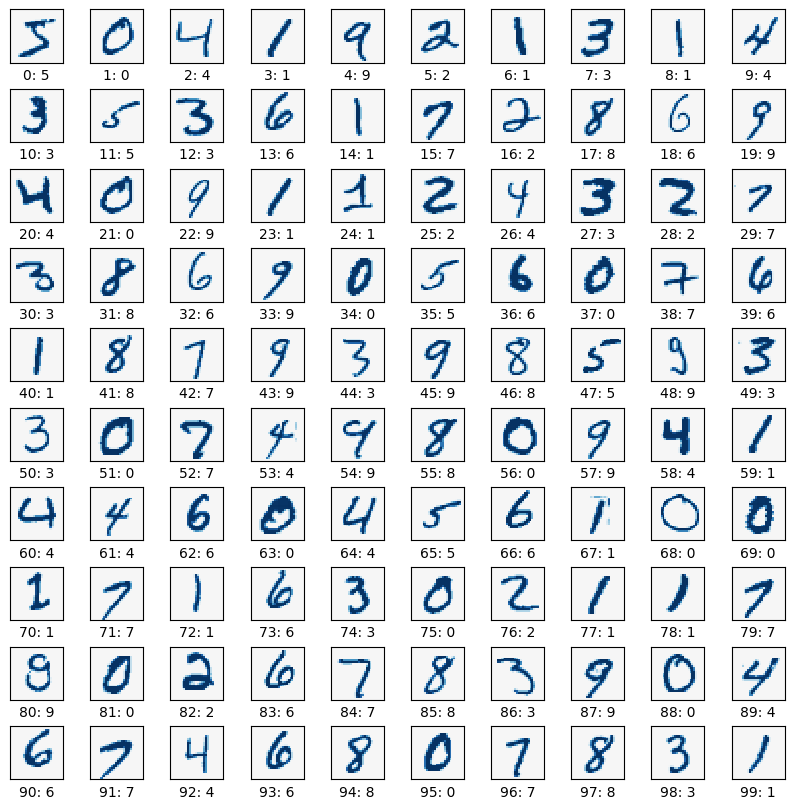

In [ ]:
row_count = 10
col_count = 10

X_data = X_csv.to_numpy()
X_data = X_data[:, 1:]
y_data_temp = y_csv.to_numpy()
y_data = np.zeros(len(y_data_temp))
for k in range(len(y_data_temp)):
    y_data[k] = y_data_temp[k][1]

print(X_data.shape)
print(y_data.shape)

visualize(X_data, y_data, row_count, col_count, 0)

## Implementation

In [ ]:
class FFNN:
    def __init__(self):
        self.x = 30

In [ ]:

a_k = FFNN()
print(a_k.x)

10


## With Library

[[8.63626536e-11 4.65251038e-14 9.99994388e-01 1.37041916e-07
  1.63340714e-11 1.41068751e-14 3.11054455e-09 5.47132261e-06
  2.55097799e-13 1.30029272e-13]]
0.9311
(70000, 784)
(70000,)


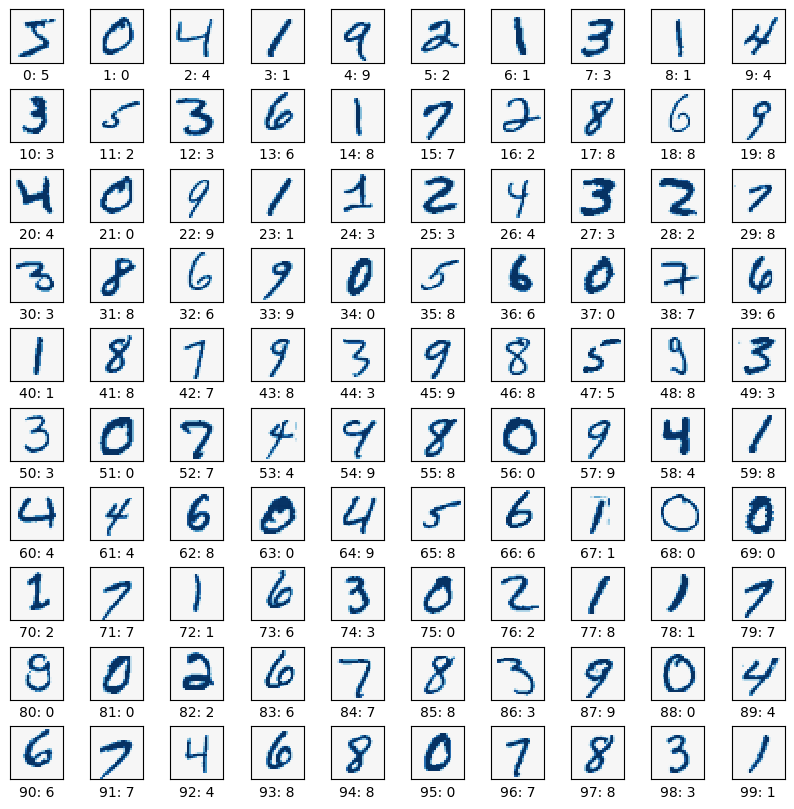

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# X, y = make_classification(n_samples=100, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
print(clf.score(X_test, y_test))
# X_MLP = X_test[0:5]
# y_MLP = clf.predict(X_MLP)
# visualize(X_MLP, y_MLP, 1, 3)
# print(X_MLP)
# print(y_MLP)


y_MLP = clf.predict(X_data)
print(X_data.shape)
print(y_MLP.shape)
visualize(X_data, y_MLP, 10, 10, 0)

In [ ]:
differences = 0
for k in range(len(y_data)):
    if int(y_data[k]) != int(y_MLP[k]):
        differences += 1
print(differences)

print(str((1-differences/len(y_data)) * 100) + "%")

11525
83.53571428571429%


In [ ]:
from typing import Literal, Callable, Union
import numpy as np


class FFNNClassifier:
    def __init__(self, 
            hidden_layer_sizes: np.typing.ArrayLike,
            activation_func: Literal['linear', 'relu', 'sigmoid', 'tanh', 'softmax'], 
            learning_rate: float,
            verbose: int,
            epoch_amount: int,
            batch_size: int,
            loss_func: Literal['mean_squared_error', 'binary_cross_entropy', 'categorical_cross_entropy']
        ):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.X: np.typing.ArrayLike = [[]]
        self.y: np.typing.ArrayLike = []
        self.weights_history = [[[]]] # array of weight matrix. index is current epoch
        self.biases_history = [[]] # array of bias list. index is current epoch

        self.activation_func = activation_func
        self.learning_rate = learning_rate
        # self.max_iter = max_iter
        self.verbose = verbose
        self.epoch_amount = epoch_amount
        self.batch_size = batch_size
        self.loss_func = loss_func


    def _init_weights(self):
        pass

    def _init_biases(self):
        pass

# region functions
    def _activation_function(self, x: Union[float, np.typing.ArrayLike], func: str):
        if func == 'linear': return x
        elif func == 'relu': return np.maximum(0, x)
        elif func == 'sigmoid': return 1.0/(1.0 + np.exp(-x))
        elif func == 'tanh': return np.tanh(x)
        elif func == 'softmax':
            exp_x = np.exp(x - np.max(x, axis=1, keepdims=True)) 
            return exp_x / np.sum(exp_x, axis=1, keepdims=True) # keepdims=True will keep the dimension of the original array
        raise "Activation function not supported!"
    
    def _activation_derived_function(self, x: Union[float, np.typing.ArrayLike], func: str):
        if func == 'linear': return np.ones_like(x)
        elif func == 'relu': return np.where(x > 0, 1, 0)
        elif func == 'sigmoid':
            sig = self._activation_function(x, 'sigmoid')
            return sig * (1 - sig)
        elif func == 'tanh': 
            p = 2.0/(np.exp(x) - np.exp(-x))
            return p*p
        elif func == 'softmax': # TODO: Check if this implementation is correct
            delta = np.zeros_like(x) 
            for i in range(x.shape[0]): delta[i, i] = 1
            softmax = self._activation_function(x, 'softmax')
            return softmax*(delta-softmax) 
        raise "Activation function not supported!"
    

    def _loss_function(self, y_act, y_pred, number_of_classes, func: str):
        if func == 'mean_squared_error': return self.mean_squared_error(y_act, y_pred)
        elif func == 'binary_cross_entropy': return self.binary_cross_entropy(y_act, y_pred)
        elif func == 'categorical_cross_entropy': return self.categorical_cross_entropy(y_act, y_pred, number_of_classes)
    def mean_squared_error(y_act, y_pred):
        res = 0
        n = len(y_act)
        for i in range(n):
            minus = y_act - y_pred
            res += minus*minus
        return res/n
    def binary_cross_entropy(y_act, y_pred, n):
        res = 0
        n = len(y_act)
        for i in range(n):
            res += y_act*np.log(y_pred) + (1-y_act)*np.log(1-y_pred)
        return -res/n
    def categorical_cross_entropy(y_act, y_pred, c):
        res = 0
        n = len(y_act)
        for i in range(n):
            for j in range(c):
                res += y_act[i][j]*np.log(y_pred[i][j])
        return -res/n

# endregion functions


# region getters setters
    def _get_current_weight_in_layer(self, layer: int):
        return self.weights_history[len(self.weights_history)-1][layer]

    def _get_current_bias_in_layer(self, layer: int):
        return self.biases_history[len(self.biases_history)-1][layer]

    def _update_current_weights(self, new_weights):
        self.weights_history[len(self.biases_history)-1] = new_weights

    def _update_current_biases(self, new_biases):
        self.biases_history[len(self.biases_history)-1] = new_biases
    
    # Can only be called after setting X and y
    def _get_hidden_layer_sizes(self):
        if len(self.X) == 0:
            raise "len(self.X) == 0"
        if len(self.X[0]) == 0:
            raise "len(self.X[0]) == 0"
        if len(self.y) == 0:
            raise "len(self.y) == 0"
        
        len_x = len(self.X[0])
        len_y = len(self.y)
        layer_sizes = [len_x]
        for i in range(len(self.hidden_layer_sizes)):
            layer_sizes.append(self.hidden_layer_sizes[i])
        layer_sizes.append(len_y)
        
        return layer_sizes

    # Can only be called after setting X and y
    def _get_number_of_classes(self):
        return len(np.unique(self.y))
    
# endregion getters setters

    def fit(self, X: np.typing.ArrayLike, y: np.typing.ArrayLike):
        self.X = X
        self.y = y
        
        self._init_weights()
        self._init_biases()
        layer_sizes = self._get_hidden_layer_sizes()
        network_depth = len(layer_sizes)
        number_of_classes = self._get_number_of_classes()

        for current_dataset_idx in range(len(self.X)):
            # Feed Forward
            a = np.zeros((network_depth, len(self.X[current_dataset_idx])))
            h = np.zeros((network_depth, len(self.X[current_dataset_idx])))
            h[0] = self.X[current_dataset_idx]
            for k in range(1, len(network_depth)):
                b_k = self._get_current_bias_in_layer(k)
                w_k = self._get_current_weight_in_layer(k)
                h_k_min_1 = h[k-1]

                a_k = b_k + np.dot(w_k, h_k_min_1)
                a[k] = a_k
                h[k] = self._activation_function(a_k, self.activation_func)
            
            loss_grad = self._loss_function(
                y_act=self.y[current_dataset_idx], 
                y_pred=h[network_depth-1], 
                number_of_classes=number_of_classes, 
                func=self.loss_func
            )

            # Backward Propagation
            delta = loss_grad * self._activation_derived_function(a[-1], self.activation_func)
            weight_grads = [np.dot(h[-2].T, delta)]
            bias_grads = [np.sum(delta, axis=0, keepdims=True)]

            for k in range(len(self.hidden_layer_sizes), 0, -1):
                weights = self._get_current_weight_in_layer(k)
                delta = np.dot(delta, weights.T) * self._activation_derived_function(a[k-1], self.activation_func)
                weight_grads.insert(0, np.dot(h[k-1].T, delta))
                bias_grads.insert(0, np.sum(delta, axis=0, keepdims=True))
            
            new_weights = []
            new_biases = []
            for k in range(len(self.weights_history)):
                w_k = self._get_current_weight_in_layer(k)
                new_weights.append(w_k - self.learning_rate * weight_grads[k])
                new_biases.append(w_k - self.learning_rate * bias_grads[k])
            self.weights_history.append(new_weights)
            self.biases_history.append(new_biases)
        


    def predict(self, X_test: np.ArrayLike):
        prediction = np.zeros(len(X_test))
        for i in range(len(X_test)):
            X = X_test[i]
            len_weight = len(self._get_current_weight_in_layer(0))
            for k in range(len_weight):
                b_k = self._get_current_bias_in_layer(k)
                w_k = self._get_current_weight_in_layer(k)

                a_k = b_k + np.dot(w_k, X)
                X = self._activation_function(a_k, self.activation_func)
            
            predicted_class = np.argmax(X) # idx with highest value. idx is also the class
            prediction[i] = predicted_class
            
        return prediction

    
    def predict_proba(X_test: np.ArrayLike):
        pass

    def score(X_test, y_test):
        pass



In [ ]:
ffnnn = FFNNClassifier(
    hidden_layer_sizes=(64, 64),
    activation_func="relu",
    learning_rate=0.1,
    max_iter=20,
    verbose=0,
    epoch_amount=5,
    batch_size=10
)
ffnnn.fit(X_train, y_train)
prediction = ffnnn.predict(X_test)
visualize(X_test, prediction, 10, 10)
